## Finding insides from AirBnB in Berlin

In this project I used the [Cross Industry Process](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for Data Mining on the [Berlin AirBnB dataset](http://insideairbnb.com/get-the-data.html). I hope this project will give you some valuable insides for Berlin.

The CRISP-DM process can be broken down into several steps which help understanding the problem

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Deploy


In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from support import *

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

debug = False

## Business Understanding


## Data Understanding

To answer the questions curated below it is necessary to obtain some sort of Data understanding. This includes a general overview of what kind of information is available within the dataset. But also where there might be potential shortcomings, such as missing data. 

We are going to work with such datasets:

- listings.csv consists of details of all the listings in Berlin including their price, accomodates, ratings, number of reviews, summary, name, owner name, Description, host Id and many other columns decribing details of listings.

- calendar.csv consists of details of listings and its availability and its price.


In [2]:
# Reat the data
listings = pd.read_csv('data/listings.csv.gz', low_memory=False, compression="gzip")
# calendar = pd.read_csv('./calendar.csv')

In [ ]:
# Checking the shape of the listings datasets
if debug:
    listings.shape
    listings.head()

In [ ]:
if debug:
    pd.options.display.max_columns = listings.shape[1]
    listings.describe()

In [2]:
# Data owerview 
if debug:
    colcheck(listings)

In [ ]:
if debug:
    listings.isnull().mean()

In [ ]:
#Provide a set of column name that have no values and must be dropped
if debug:
    listings.columns[listings.isnull().mean() == 1]

In [ ]:
#listings.columns.tolist()

In [ ]:
if debug:
    listings.hist(figsize=(16,100),layout=(44,1));

In [ ]:
if debug:
    plt.figure(figsize=(16,10))
    sns.heatmap(listings.corr(), annot=True, fmt='.1f')

In [47]:
if debug:
    listings.dtypes.value_counts()

object     62
float64    23
int64      21
dtype: int64

## Prepare Data

decide on the data that we are going to use for our analysis. 

In [32]:
# Define a subset of the original Listing dataset
ss = listings[['id','price', 'property_type', 'bedrooms', 'minimum_nights',
               'number_of_reviews', 'reviews_per_month','review_scores_value', 'availability_365', 'availability_90', 'availability_60', 'availability_30']]

#To simplify let's use only appartments
ss = ss[ss['property_type']=='Apartment']

# After filtering out only the apartments let's drop property_type
ss = ss.drop(columns=['property_type'])

In [8]:
if debug:
    showmissing(ss)

In [ ]:
#Drop missing values
ss.dropna(axis=0)

In [33]:
# Clearing the price

# ss = ss.replace({'price': r'\$(\d{,3})\,?(\d{,3})\.*(\d{,3})'}, {'price': r'\1\2'}, regex=True)
# ss.price = ss['price'].astype(int)

ss['price'] = ss['price'].str.replace(',', '')
ss['price'] = ss['price'].str.replace('$', '')
ss['price'] = ss['price'].astype(float)
ss['price'].describe()


count    21849.000000
mean        61.782461
std         91.428355
min          0.000000
25%         33.000000
50%         49.000000
75%         75.000000
max       9000.000000
Name: price, dtype: float64

In [53]:
#Values destributon
ss.price.value_counts(normalize = True, bins = 20)

(-9.001, 450.0]     0.997757
(450.0, 900.0]      0.001693
(900.0, 1350.0]     0.000320
(4950.0, 5400.0]    0.000046
(1350.0, 1800.0]    0.000046
(1800.0, 2250.0]    0.000046
(8550.0, 9000.0]    0.000046
(4050.0, 4500.0]    0.000046
(5400.0, 5850.0]    0.000000
(5850.0, 6300.0]    0.000000
(4500.0, 4950.0]    0.000000
(8100.0, 8550.0]    0.000000
(3600.0, 4050.0]    0.000000
(3150.0, 3600.0]    0.000000
(2700.0, 3150.0]    0.000000
(2250.0, 2700.0]    0.000000
(6300.0, 6750.0]    0.000000
(6750.0, 7200.0]    0.000000
(7200.0, 7650.0]    0.000000
(7650.0, 8100.0]    0.000000
Name: price, dtype: float64

In [61]:
# Remowe all prices higher then 450
ss[ss['price'] >= 450]
ss = ss[ss['price'] <= 450]

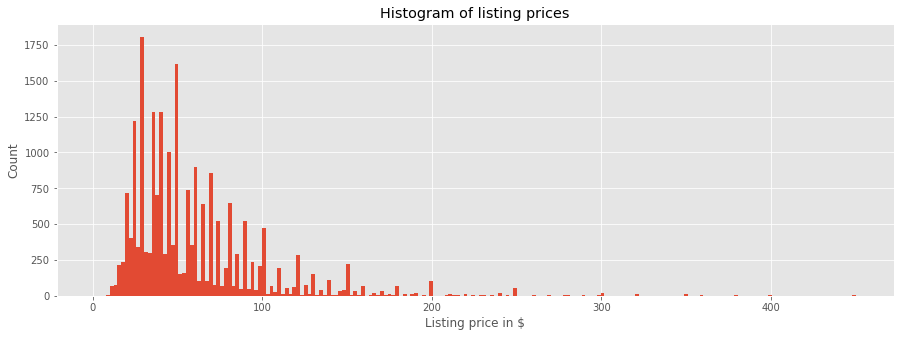

In [75]:
ss.loc[(ss.price <= 450) & (ss.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');


In [58]:
# pd.options.display.max_columns = listings.shape[1]
# listings[listings['id'] == 22673624]#[['id','price']]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14265,22673624,https://www.airbnb.com/rooms/22673624,20191112224519,2019-11-14,Cozy Apartment Kreuzberg (4 BR & 2 Baths),Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,none,NaN,Please no downloading of ilegal material or co...,The metro station Gneisenaustrasse is directly...,You have the whole apartment for yourselves :)!,You can always call me.,HOUSE RULES Remember // Act responsible & peac...,NaN,NaN,https://a0.muscache.com/im/pictures/f4821733-e...,NaN,167067226,https://www.airbnb.com/users/show/167067226,Magali,2018-01-10,DE,NaN,within an hour,87%,NaN,t,https://a0.muscache.com/im/pictures/user/bc068...,https://a0.muscache.com/im/pictures/user/bc068...,Kreuzberg,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,"Berlin, Berlin, Germany",Kreuzberg,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10961,Berlin,"Berlin, Germany",DE,Germany,52.49331,13.39669,t,Apartment,Entire home/apt,15,2.0,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",NaN,$500.00,NaN,NaN,$0.00,$80.00,2,$20.00,2,1125,2,2,1125,1125,2.0,1125.0,3 days ago,t,17,47,77,167,2019-11-14,67,50,2018-07-07,2019-10-26,95.0,10.0,9.0,10.0,9.0,10.0,9.0,t,NaN,NaN,t,f,flexible,f,f,9,9,0,0,4.05


In [59]:
# Add boolean 
boolean_feature = ['host_identity_verified', 'instant_bookable', 'host_is_superhost']
for i in boolean_feature:
    ss[i] = listings[i].map({'t': True, 'f': False})
ss.head()

,id,price,bedrooms,minimum_nights,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost
0,1944,21.0,1.0,60,8.0,251,25,25,9,True,False,False
1,3176,90.0,1.0,62,9.0,344,69,39,9,True,False,False
2,3309,28.0,1.0,7,9.0,317,42,12,0,False,False,False
4,7071,33.0,1.0,3,10.0,30,30,30,21,True,False,True
5,9991,180.0,4.0,6,10.0,45,8,1,0,True,False,False


In [72]:
# boolean_feature = ['host_identity_verified', 'instant_bookable', 'host_is_superhost']
# for i in boolean_feature:
ss['host_is_superhost'].value_counts()

False    18462
True      3314
Name: host_is_superhost, dtype: int64

In [73]:
#Cancelation
ss = pd.concat([ss, pd.get_dummies(listings['cancellation_policy'])],axis=1)
ss.head()

,id,price,bedrooms,minimum_nights,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,1944.0,21.0,1.0,60.0,8.0,251.0,25.0,25.0,9.0,True,False,False,0,1,0,0,0,0
1,3176.0,90.0,1.0,62.0,9.0,344.0,69.0,39.0,9.0,True,False,False,0,0,0,1,0,0
2,3309.0,28.0,1.0,7.0,9.0,317.0,42.0,12.0,0.0,False,False,False,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
4,7071.0,33.0,1.0,3.0,10.0,30.0,30.0,30.0,21.0,True,False,True,0,1,0,0,0,0


In [74]:
#Room type
ss = pd.concat([ss, pd.get_dummies(listings['room_type'])],axis=1)
ss.head()

,id,price,bedrooms,minimum_nights,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,Entire home/apt,Hotel room,Private room,Shared room
0,1944.0,21.0,1.0,60.0,8.0,251.0,25.0,25.0,9.0,True,False,False,0,1,0,0,0,0,0,0,1,0
1,3176.0,90.0,1.0,62.0,9.0,344.0,69.0,39.0,9.0,True,False,False,0,0,0,1,0,0,1,0,0,0
2,3309.0,28.0,1.0,7.0,9.0,317.0,42.0,12.0,0.0,False,False,False,0,0,0,1,0,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,0,0,0
4,7071.0,33.0,1.0,3.0,10.0,30.0,30.0,30.0,21.0,True,False,True,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Neigbohurs
ss = pd.concat([ss, pd.get_dummies(listings['neighbourhood_group_cleansed'])],axis=1)

In [76]:
#amenities
tempdf = listings.copy()

tempdf['amenities'] = tempdf['amenities'].map(lambda x: x.replace('"','').replace('{','').replace('}','').split(','))
unique_amenities = np.unique(np.concatenate(tempdf['amenities'].values))
amenities_array = np.array([tempdf['amenities'].map(lambda x: i in x) for i in unique_amenities])
amenities_array_t = amenities_array.T
amenities_df = pd.DataFrame(data=amenities_array_t, columns=unique_amenities)
amenities_df.head()

,,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling hoist,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,EV charger,Electric profiling bed,Elevator,...,Pool,Pool with pool hoist,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Projector and screen,Rain shower,Refrigerator,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Steam oven,Step-free shower,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True

In [77]:
# The data had some outliers, which I quickly dropped
amenities_df.drop(amenities_df.columns[[0, 134, 135]],axis=1,inplace=True)
amenities_df.head()

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling hoist,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,EV charger,Electric profiling bed,Elevator,En suite bathroom,...,Pillow-top mattress,Pocket wifi,Pool,Pool with pool hoist,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Projector and screen,Rain shower,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Steam oven,Step-free shower,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,F

In [78]:
features = pd.concat([ss, amenities_df], axis=1)
print(features.shape)

(24586, 197)


In [79]:
features = features.dropna(axis=0)
print(features.shape)

(17722, 197)


In [80]:
features.head()

,id,price,bedrooms,minimum_nights,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,Entire home/apt,Hotel room,Private room,Shared room,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,...,Pillow-top mattress,Pocket wifi,Pool,Pool with pool hoist,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Projector and screen,Rain shower,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Steam oven,Step-free shower,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,1944.0,21.0,1.0,60.0,8.0,251.0,25.0,25.0,9.0,True,False,False,0,1,0,0,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,3176.0,90.0,1.0,62.0,9.0,344.0,69.0,39.0,9.0,True,False,False,0,0,0,1,0,0,1,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3309.0,28.0,1.0,7.0,9.0,317.0,42.0,12.0,0.0,False,False,False,0,0,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
4,7071.0,33.0,1.0,3.0,10.0,30.0,30.0,30.0,21.0,True,False,True,0,1,0,0,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
5,9991.0,180.0,4.0,6.0,10.0,45.0,8.0,1.0,0.0,True,False,F